<a href="https://colab.research.google.com/github/bhnunes/FT043/blob/main/Atividade%202/Atividade_2_computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

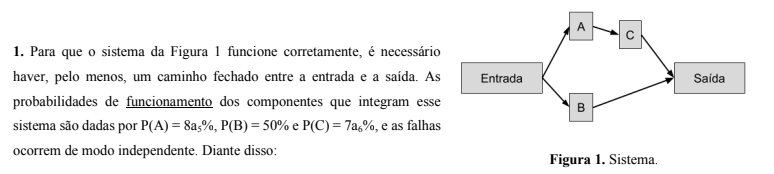

In [2]:
import numpy as np
import pandas as pd

***Criação de todos os estados***

In [3]:
estados_A=[]
estados_B=[]
estados_C=[]
estados_Sistema=[]

for i in [0,1]:
  for j in [0,1]:
    for k in [0,1]:
      estados_A.append(i)
      estados_B.append(j)
      estados_C.append(k)
print(estados_A)
print(estados_B)
print(estados_C)

[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 1, 1, 0, 0, 1, 1]
[0, 1, 0, 1, 0, 1, 0, 1]


Para os estados finais do sistema, precisamos considerar os caminhos em série (A e C) e paralelo (B), ou seja:

$\ (A\cap C)\cup B $

In [4]:
for i, j, k in zip(estados_A, estados_B, estados_C):
  if (i==1 and k==1) or j==1:
    estados_Sistema.append(1)
  else:
    estados_Sistema.append(0)

print(estados_Sistema)

[0, 0, 1, 1, 0, 1, 1, 1]


Dado que o RA é **197225**, temos para as probabilidades de funcionamento:

P(A) = 0.82

P(B) = 0.5

P(C) = 0.75

E Portanto, para as probabilidades de não funcionamento, dado que P(nX) = 1 - P(X), onde X é o componenente:

P(nA) = 0.18

P(nB) = 0.5

P(nC) = 0.25

In [13]:
P_A = 0.82
P_B = 0.5
P_C = 0.75

P_nA = 1 - P_A
P_nB = 1 - P_B
P_nC = 1 - P_C

Criando os valores de probabilidade para os estados, temos:

In [14]:
prob_Estados_A=[]
prob_Estados_B=[]
prob_Estados_C=[]

for estado in estados_A:
  if estado == 0:
    prob_Estados_A.append(P_nA)
  else:
    prob_Estados_A.append(P_A)

for estado in estados_B:
  if estado == 0:
    prob_Estados_B.append(P_nB)
  else:
    prob_Estados_B.append(P_B)

for estado in estados_C:
  if estado == 0:
    prob_Estados_C.append(P_nC)
  else:
    prob_Estados_C.append(P_C)

Para as probabilidades dos estados do sistema, dado que estamos tratando de eventos independentes, temos que as mesmas são simplesmeste a multiplicação das probabilidades:

In [17]:
prob_Estados_Sistema=[]

for a, b, c in zip(prob_Estados_A, prob_Estados_B, prob_Estados_C):
  prob_Estados_Sistema.append(a*b*c)

print(prob_Estados_Sistema)

[0.022500000000000006, 0.06750000000000002, 0.022500000000000006, 0.06750000000000002, 0.1025, 0.3075, 0.1025, 0.3075]


Precisamos agora criar um dataframe com todos os dados gerados até aqui:

In [21]:
df=pd.DataFrame({'Estados_A':estados_A,'Estados_B':estados_B,'Estados_C':estados_C,'Estados_Sistema':estados_Sistema,'prob_Estados_A':prob_Estados_A,'prob_Estados_B':prob_Estados_B,'prob_Estados_C':prob_Estados_C, 'prob_Estados_Sistema':prob_Estados_Sistema})
df.head(50)

,Estados_A,Estados_B,Estados_C,Estados_Sistema,prob_Estados_A,prob_Estados_B,prob_Estados_C,prob_Estados_Sistema
0,0,0,0,0,0.18,0.5,0.25,0.0225
1,0,0,1,0,0.18,0.5,0.75,0.0675
2,0,1,0,1,0.18,0.5,0.25,0.0225
3,0,1,1,1,0.18,0.5,0.75,0.0675
4,1,0,0,0,0.82,0.5,0.25,0.1025
5,1,0,1,1,0.82,0.5,0.75,0.3075
6,1,1,0,1,0.82,0.5,0.25,0.1025
7,1,1,1,1,0.82,0.5,0.75,0.3075


***a) Estime a probabilidade do sistema funcionar.***

Para verificarmos a probabilidade de o sistema funcionar, precisamos apenas somar as probabilidades de funcionamento dos estados (prob_Estados_sistema) dado que Estados_Sistema ==1

In [22]:
prob_funcionar=df[df['Estados_Sistema']==1]['prob_Estados_Sistema'].sum()

print(f'A probabilidade de o sistema funcionar é de {prob_funcionar*100}%')

A probabilidade de o sistema funcionar é de 80.75%


***b) Dado que o sistema funciona, qual é a probabilidade do componente C estar funcionando?***

Pelo teorema de Bayes:

$\ P(C|Func) = P(Func|C)*\frac{P(C)}{P(Func)} $

Mas, pelo teorema da probabilidade condicional:

$\ P(Func|C)=\frac{P(C\cap Func)}{P(C)} $

Portanto:

$\ P(C|Func) = \frac{P(C\cap Func)}{P(Func)} $

In [23]:
prob_C_dado_Func=df[(df['Estados_Sistema']==1) & (df['Estados_C']==1)]['prob_Estados_Sistema'].sum()/prob_funcionar
print(f'A probabilidade de a componente C estar funcionando dado que o sistema funciona é de {prob_C_dado_Func*100}%')

A probabilidade de a componente C estar funcionando dado que o sistema funciona é de 84.52012383900929%


***c) Dado que o sistema funciona, qual é a probabilidade do componente B estar funcionando?***

De maneira equivalente ao exemplo anterior,

$\ P(B|Func) = \frac{P(B\cap Func)}{P(Func)} $

In [24]:
prob_B_dado_Func=df[(df['Estados_Sistema']==1) & (df['Estados_B']==1)]['prob_Estados_Sistema'].sum()/prob_funcionar
print(f'A probabilidade de a componente B estar funcionando dado que o sistema funciona é de {prob_B_dado_Func*100}%')

A probabilidade de a componente B estar funcionando dado que o sistema funciona é de 61.91950464396285%


***d) Qual é a probabilidade do sistema funcionar dado que A funciona?***

Pelo teorema da probabilidade condicional

$\ P(Func|A) = \frac{P(Func\cap A)}{P(A)} $

In [25]:
prob_Func_dado_A=df[(df['Estados_Sistema']==1) & (df['Estados_A']==1)]['prob_Estados_Sistema'].sum()/P_A
print(f'A probabilidade de o sistema funcionar dado que A funciona é de {prob_Func_dado_A*100}%')

A probabilidade de o sistema funcionar dado que A funciona é de 87.50000000000001%
